# SYRIATEL CUSTOMER CHURN

## Project overview

This research employs machine learning algorithms to create a model that can accurately predict which customers will churn based on the information in the dataset. The dataset includes 20 predictor variables, the majority of which relate to client usage habits. This dataset contains 3333 records, 483 of which are churners while the remaining 2850 are non-churners. The goal variable is 'churn'. Because the goal variable is categorical, classification methods are utilised to develop the prediction model. Recall is used to assess the model's performance.

## Business understanding

### Business problem

To enhance their income base, telecommunications businesses must attract new consumers while also increasing client retention rates. Customer churn is one of the most pressing challenges for large businesses. Customer churn is a measure that indicates when a subscriber or frequent customer cancels his subscription or discontinues doing business with a company. Churn can be caused by a variety of circumstances, such as switching to a rival for better pricing, cancelling their subscription owing to bad customer service, or ending all engagement with a brand due to insufficient touchpoints.

Syriatel is a mobile telecommunications and data services company established in Damascus, Syria. The company provides calls, news, messages, GSM, and internet services. It has built a strong reputation by focusing on customer happiness and social responsibility. Syriatel has determined that building long-term connections with clients is more beneficial than attempting to acquire new customers. They believe that keeping a client is less expensive than acquiring a new one. Churn prediction has thus become a critical component of the company's strategy. The goal of this project is to create a model that accurately predicts which customers are most likely to churn, as well as to determine the characteristics that are significant for predicting customer churn. Syriatel can thus take action to prevent the customer who is likely to churn from actually churning.

### Objectives

- To build a machine learning model that can accurately predict customers  who will churn based on the information available in the dataset.<br>
- To identify the features that are important for predicting customer churn.

### Success criteria:

The most significant parameter for evaluating the performance of the classification algorithm is recall. Recall is the rate at which the model properly predicts consumers who are likely to churn. The ultimate goal is to minimise false negatives. Failure to recognise a client that is ready to churn is more expensive for the business than incorrectly identifying a non-churning customer. A successful model should have a recall rate of at least 85%.
However, if the model predicts that all consumers would leave, it will have an ideal recall. This is not beneficial to the firm because it is obvious that not all customers will churn. It will be critical to monitor precision and accuracy as secondary measures.

### Load and understand the data

In [53]:
# install imblearn library
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load and preview dataset
customer_df = pd.read_csv(r"C:\Users\ADMIN\Downloads\archive (3).zip")
customer_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# number of rows and columns of customer_df
print(f'customer_df has {customer_df.shape[0]} rows and {customer_df.shape[1]} columns')

customer_df has 3333 rows and 21 columns


In [5]:
# summary of the dataframe
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Cleaning

The customer's phone number is the unique identifier. There should be no duplicate phone numbers.

In [6]:
# check for duplicates using the phone number
customer_df.duplicated(subset='phone number').value_counts()

False    3333
Name: count, dtype: int64

In [7]:
# check for missing values
customer_df.isna().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataframe has no duplicates and no missing values.

In [8]:
# area code data type
customer_df['area code'].dtype

dtype('int64')

No mathemathical computation can be done on the area code, so it is best to convert it to an object data type.

In [9]:
# convert area code from integer to string
customer_df['area code'] = customer_df['area code'].astype(object)
customer_df['area code'].dtype

dtype('O')

## Exploratory data analysis

### Univariate analysis


Churn is the target variable for this classification project. 

In [10]:
# unique values of the target variable
customer_df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

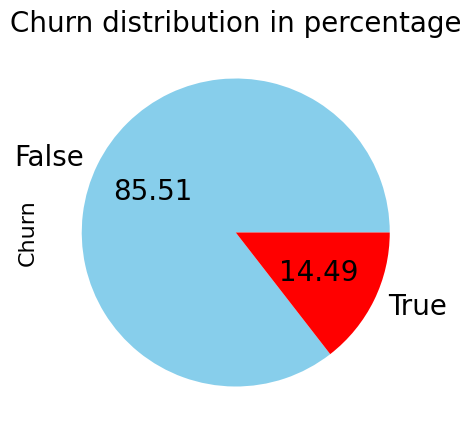

In [11]:
# pie chart showing distribution of target variable
fig, ax = plt.subplots(figsize=(10, 5))

customer_df.groupby('churn').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, colors=['skyblue', 'red'], ax=ax)
ax.set_ylabel('Churn', fontsize=16)
ax.set_title('Churn distribution in percentage', fontsize=20);

There is a class imbalance problem since the target class has an uneven distribution of observations. 85.51% of the data belongs to the False class while 14.49% belongs to the true class.

The dataset has both categorical and continuous features. 

In [12]:
# summary statistics
customer_df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


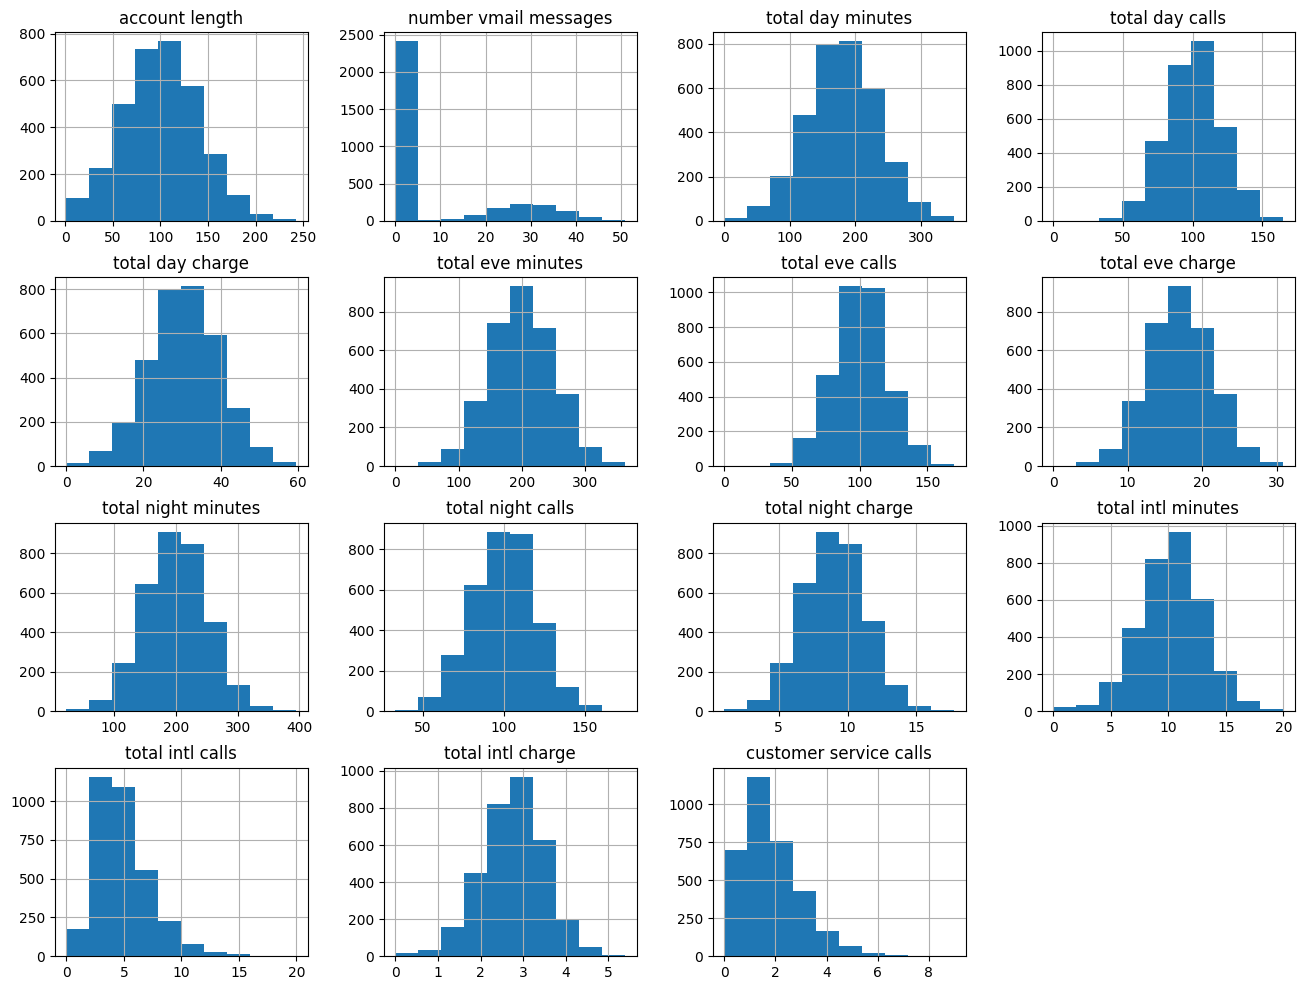

In [13]:
# distribution of features
customer_df.drop(columns='churn').hist(figsize=(16,12));

The scaling differs across the features, and a few of the features are not normally distributed.  The features will therefore have to be scaled and normalized.

In [14]:
# unique values of categorical features
categorical_cols = customer_df.drop('phone number', axis=1).select_dtypes(include='object').columns
for col in categorical_cols:
    print(col.upper())
    print(customer_df[col].unique())
    print('****************************************************** \n')

STATE
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
****************************************************** 

AREA CODE
[415 408 510]
****************************************************** 

INTERNATIONAL PLAN
['no' 'yes']
****************************************************** 

VOICE MAIL PLAN
['yes' 'no']
****************************************************** 



### Multivariate analysis

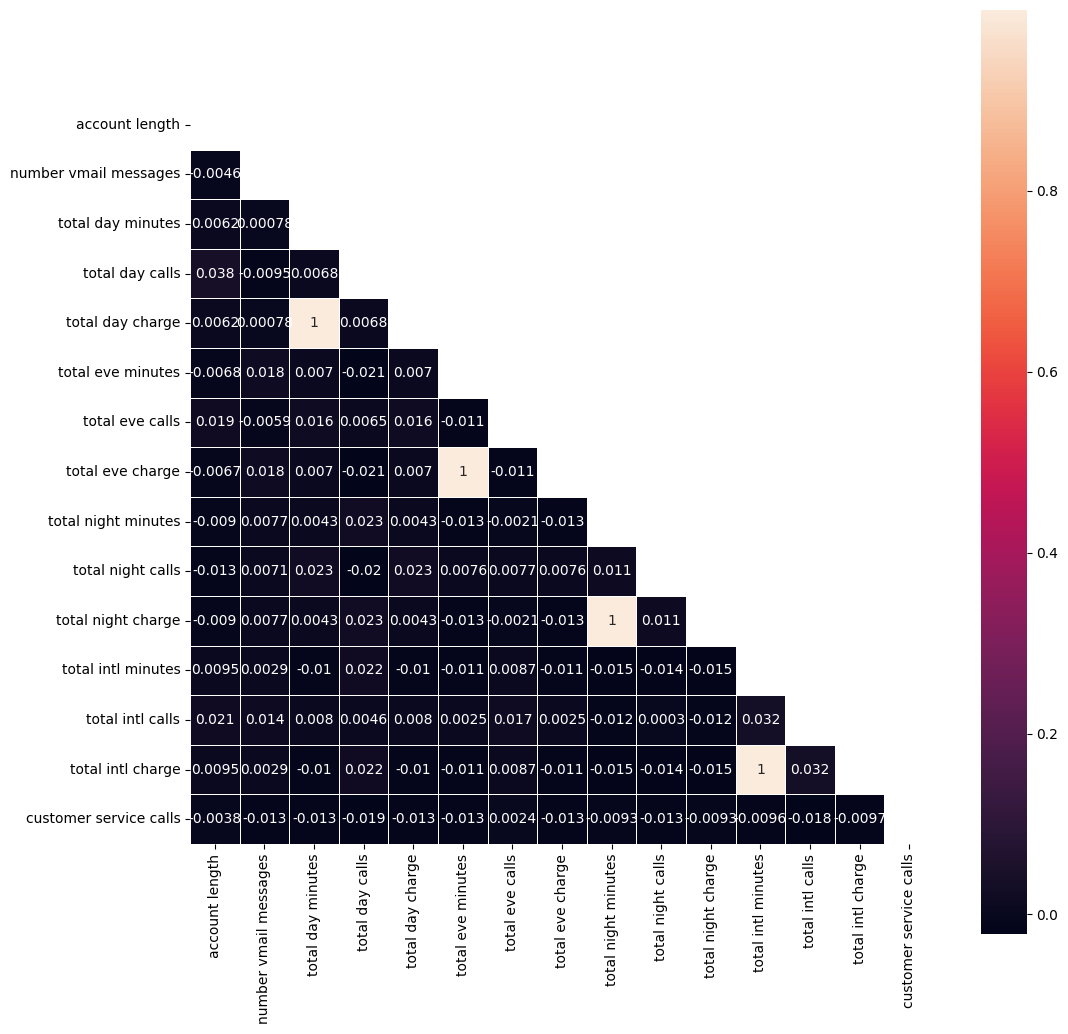

In [16]:
# Exclude non-numeric columns
numeric_columns = customer_df.select_dtypes(include=['number']).columns
numeric_df = customer_df[numeric_columns]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, linewidths=0.5, mask=mask, square=True, ax=ax, annot=True)
plt.show()

- There is a very low correlation between most features. <br>
- However, there is a perfect positive correlation between total evening charge and total evening minutes, total day charge and total day minutes, total night charge and total night minutes, and total international charge and total international minutes. This is expected since the charge of a call depends on the length of the call in minutes. One correlated variable will have to be dropped from each pair to handle multicollinearity. <br>
- total day minutes, total day charge and customer service calls have a weak positive correlation with churn. <br>
- The other features have a negligible correlation with churn, approximately 0.

## Data preparation for Machine Learning

### Multicollinearity of features

In [18]:
# Select only numeric columns
numeric_df = customer_df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr().abs()

# Stack the correlation matrix
stacked_correlation = correlation_matrix.stack().reset_index()

# Sort the values in descending order
sorted_correlation = stacked_correlation.sort_values(0, ascending=False)

# Create pairs
sorted_correlation['pairs'] = list(zip(sorted_correlation['level_0'], sorted_correlation['level_1']))

# Set pairs as index
sorted_correlation.set_index(['pairs'], inplace=True)

In [43]:
# Convert non-numeric columns to numeric or drop them
numeric_customer_df = customer_df.apply(pd.to_numeric, errors='coerce').dropna()

# Compute the correlation matrix
correlation_matrix = numeric_customer_df.corr().abs()

# Stack the correlation matrix
stacked_correlation = correlation_matrix.stack().reset_index()

# Sort the values in descending order
sorted_correlation = stacked_correlation.sort_values(0, ascending=False)

# Create pairs
sorted_correlation['pairs'] = list(zip(sorted_correlation['level_0'], sorted_correlation['level_1']))

# Set pairs as index
sorted_correlation.set_index(['pairs'], inplace=True)

# Drop unnecessary columns
sorted_correlation.drop(columns=['level_1', 'level_0'], inplace=True)

# Rename the correlation column
sorted_correlation.columns = ['cc']

# Drop duplicate pairs
unique_correlation = sorted_correlation.drop_duplicates()

# Filter pairs with collinearity > 0.75
pairs_with_collinearity = unique_correlation[(unique_correlation.cc > 0.75) & (unique_correlation.cc < 1)]


In [49]:
customer_df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls',
       'churn'],
      dtype='object')

In [50]:
# drop some columns to address the collinearity
customer_df = customer_df.drop(columns = ['total day calls', 'total eve calls', 'total night calls', 'total intl calls'])
customer_df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total eve minutes', 'total night minutes',
       'total intl minutes', 'customer service calls', 'churn'],
      dtype='object')

### Train-test split

In [25]:
#select predictor and target variables
y = customer_df['churn']
X = customer_df.drop(columns=['churn', 'phone number'])

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [26]:
# preview of X_train
X_train.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
1066,KS,117,510,no,yes,25,216.0,140,224.1,69,267.9,112,11.8,4,0
1553,CO,86,415,no,no,0,217.8,93,214.7,95,228.7,70,11.3,7,0
2628,TN,37,415,no,no,0,221.0,126,204.5,110,118.0,98,6.8,3,4
882,FL,130,415,no,no,0,162.8,113,290.3,111,114.9,140,7.2,3,1
984,NV,77,415,no,no,0,142.3,112,306.3,111,196.5,82,9.9,1,1


### Transform categorical variables

In [27]:
# Creating dummy variables for the categorical columns
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train.head(3)

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
1066,117,25,216.0,140,224.1,69,267.9,112,11.8,4,...,False,False,False,False,False,False,False,True,False,True
1553,86,0,217.8,93,214.7,95,228.7,70,11.3,7,...,False,False,False,False,False,False,True,False,False,False
2628,37,0,221.0,126,204.5,110,118.0,98,6.8,3,...,False,False,False,False,False,False,True,False,False,False


SMOTE is used to handle class imbalance problems by oversampling the minority class with replacement.

### SMOTE

## K-Nearest Neighbors without SMOTE

The Gridsearch for the KNN model is commented out due to the long run time for the search. The best parameters from the search has been selected and assigned below.

In [55]:
### initate the model with no parameters

# knn_model = KNeighborsClassifier()


# # initiate grid and grid search
# param_grid = {
#     'n_neighbors': list(range(1, 20, 2)),
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2, 3, 4],
# }


# gs_knn = GridSearchCV(knn_model, param_grid=param_grid, cv=5)
# gs_knn.fit(X_train_scaled, y_train)

# gs_knn.best_params_

In [28]:
# Fit SMOTE to training data
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts()) 

churn
False    2127
True     2127
Name: count, dtype: int64


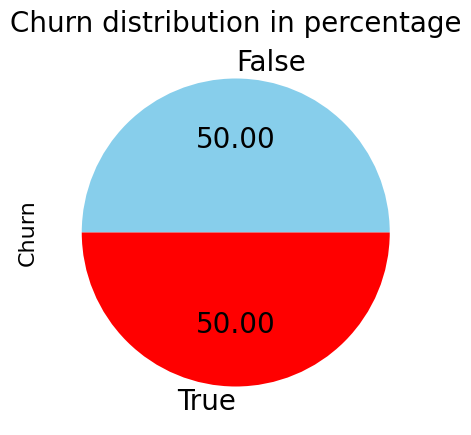

In [29]:
# pie chart showing distribution of target variable
fig, ax = plt.subplots(figsize=(10, 5))

y_train_resampled.value_counts().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, colors=['skyblue', 'red'], ax=ax)
ax.set_ylabel('Churn', fontsize=16)
ax.set_title('Churn distribution in percentage', fontsize=20);

In [30]:
# SMOTE not applied to test data
y_test.value_counts()

churn
False    723
True     111
Name: count, dtype: int64

The distribution of the churn classes is now balanced. SMOTE was applied on the training sets only. This ensured that an accurate gauge can be made on the model's performance by using a raw test sample that has not been oversampled or undersampled.

##  K-Nearest Neighbors with SMOTE

In [56]:

# calculate the current ratio of imbalance for SMOTE 
round(len(y_train[y_train==1])/len(y_train[y_train==0]),2)

0.17

We take a look at the feature names in the 'Pipeline section' above and selected the columns that were categorical. This turns out to be all the column from 28 onward.

In [58]:
from imblearn.over_sampling import SMOTENC


In [59]:
# SMOTE the categorical columns by their index
cat_range = range(28,57)
smote = SMOTENC(np.array(cat_range),random_state=42, sampling_strategy=0.5)
# X_train_resampled, y_train_resampled = smote.fit_sample(X_traain_scaled, y_train)

In [64]:
# #perform a grid search again to see if criteria changed
# param_grid = {
#     'knn__n_neighbors': list(range(2, 100, 2)),
#     'knn__weights': ['uniform', 'distance'],
#     'knn__p': [1, 2, 3, 4],
# }

# gs_knn = GridSearchCV(knn_model_smote, param_grid, cv=2, scoring='recall


In [65]:
# gs_knn.fit(X_train, y_train)

# gs_knn.best_params_

The code above is a gridsearch for the KNN smote model. The gridsearch takes a long time to complete thus the best parameters have already been set below.

In [66]:
#best knn smote model obtained from the gridsearch above
best_knn_sm = KNeighborsClassifier(n_neighbors= 32, p = 2, weights= 'distance')

In [70]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Now X_train_scaled is the scaled version of your training data


In [71]:
best_knn_sm.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=32, weights='distance')

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [78]:
pip install --upgrade scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score
from sklearn.metrics.plot import plot_confusion_matrix


def scores(model, actual=y_test, X_train_scaled=X_train_scaled, X_test_scaled=X_test_scaled, y_train=y_train):
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    
    print("Train Scores")
    print("log loss: ", log_loss(y_train, pred_train))
    print("accuracy: ", accuracy_score(y_train, pred_train))
    print("precision:", precision_score(y_train, pred_train))
    print("recall:   ", recall_score(y_train, pred_train))
    plot_confusion_matrix(model, X_train_scaled, y_train)
    
    print("Test Scores")
    print("log loss: ", log_loss(actual, pred_test))
    print("accuracy: ", accuracy_score(actual, pred_test))
    print("precision:", precision_score(actual, pred_test))
    print("recall:   ", recall_score(actual, pred_test))
    
    plot_confusion_matrix(model, X_test_scaled, actual)

# Call the scores function with the model you want to evaluate
scores(best_knn_sm)


In [ ]:
scores(best_knn_sm)

## Modeling

##  Decision Tree Model

The KNN Model with SMOTENC performed poorly so we decided to move on to a new model. Here we run a Decision Tree model to see if we have a better fit.

### Logistic regression

Logistic regression model will be used as the baseline model. ‘liblinear’ is used as the solver since the size of the dataset is small. 

In [31]:
# create a pipeline
pipe_log = Pipeline(steps=[('scale', StandardScaler()), ('logreg', LogisticRegression(fit_intercept=False, solver='liblinear'))])
pipe_log.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('logreg',
                 LogisticRegression(fit_intercept=False, solver='liblinear'))])

In [32]:
# function to evaluate the performance of the model
def evaluate(model, X_test, y_test):
    y_train_preds = model.predict(X_train_resampled)
    y_test_preds = model.predict(X_test)
    print('Recall_score: ')
    print('Train: ', recall_score(y_train_resampled, y_train_preds))
    print('Test: ', recall_score(y_test, y_test_preds))
    print('\nPrecision_score: ')
    print('Train: ', precision_score(y_train_resampled, y_train_preds))
    print('Test: ', precision_score(y_test, y_test_preds))
    print('\nAccuracy_score: ')
    print('Train: ', accuracy_score(y_train_resampled, y_train_preds))
    print('Test: ', accuracy_score(y_test, y_test_preds))
    cm = confusion_matrix(y_test, y_test_preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot();

Recall_score: 
Train:  0.844851904090268
Test:  0.2072072072072072

Precision_score: 
Train:  0.9697787371829466
Test:  0.5897435897435898

Accuracy_score: 
Train:  0.9092618711800659
Test:  0.8752997601918465


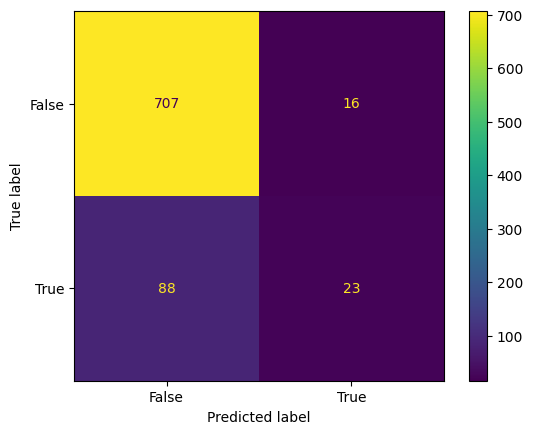

In [33]:
# evaluate the performance of the model
evaluate(pipe_log, X_test, y_test)

The model is overfitting as it performs well on the training data but does not perform well on the test data. 
Despite the model having a high accuracy on the test data, it has a very low recall score. The model is thus performing poorly due to the large number of false negatives.

### Decision Tree model

In [34]:
# Create a pipeline
pipe_dt = Pipeline(steps=[('scale', StandardScaler()), ('clf', DecisionTreeClassifier(criterion='entropy', random_state=42))])
pipe_dt.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

Recall_score: 
Train:  1.0
Test:  0.7927927927927928

Precision_score: 
Train:  1.0
Test:  0.5269461077844312

Accuracy_score: 
Train:  1.0
Test:  0.8776978417266187


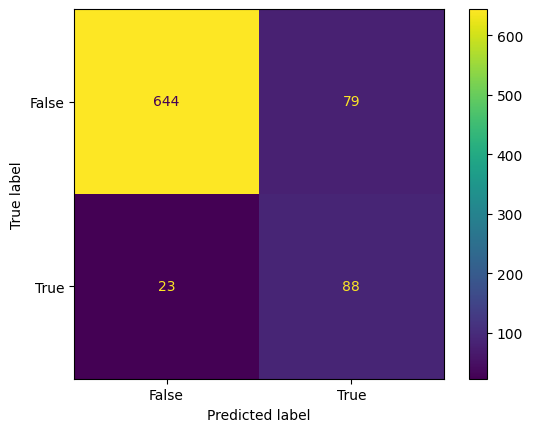

In [35]:
# evaluate the performance of the model
evaluate(pipe_dt, X_test, y_test)

The decision tree model has a higher performance compared to the baseline model. However, the model is overfitting.

In [36]:
# checking the pipeline steps to note model position
pipe_dt.steps

[('scale', StandardScaler()),
 ('clf', DecisionTreeClassifier(criterion='entropy', random_state=42))]

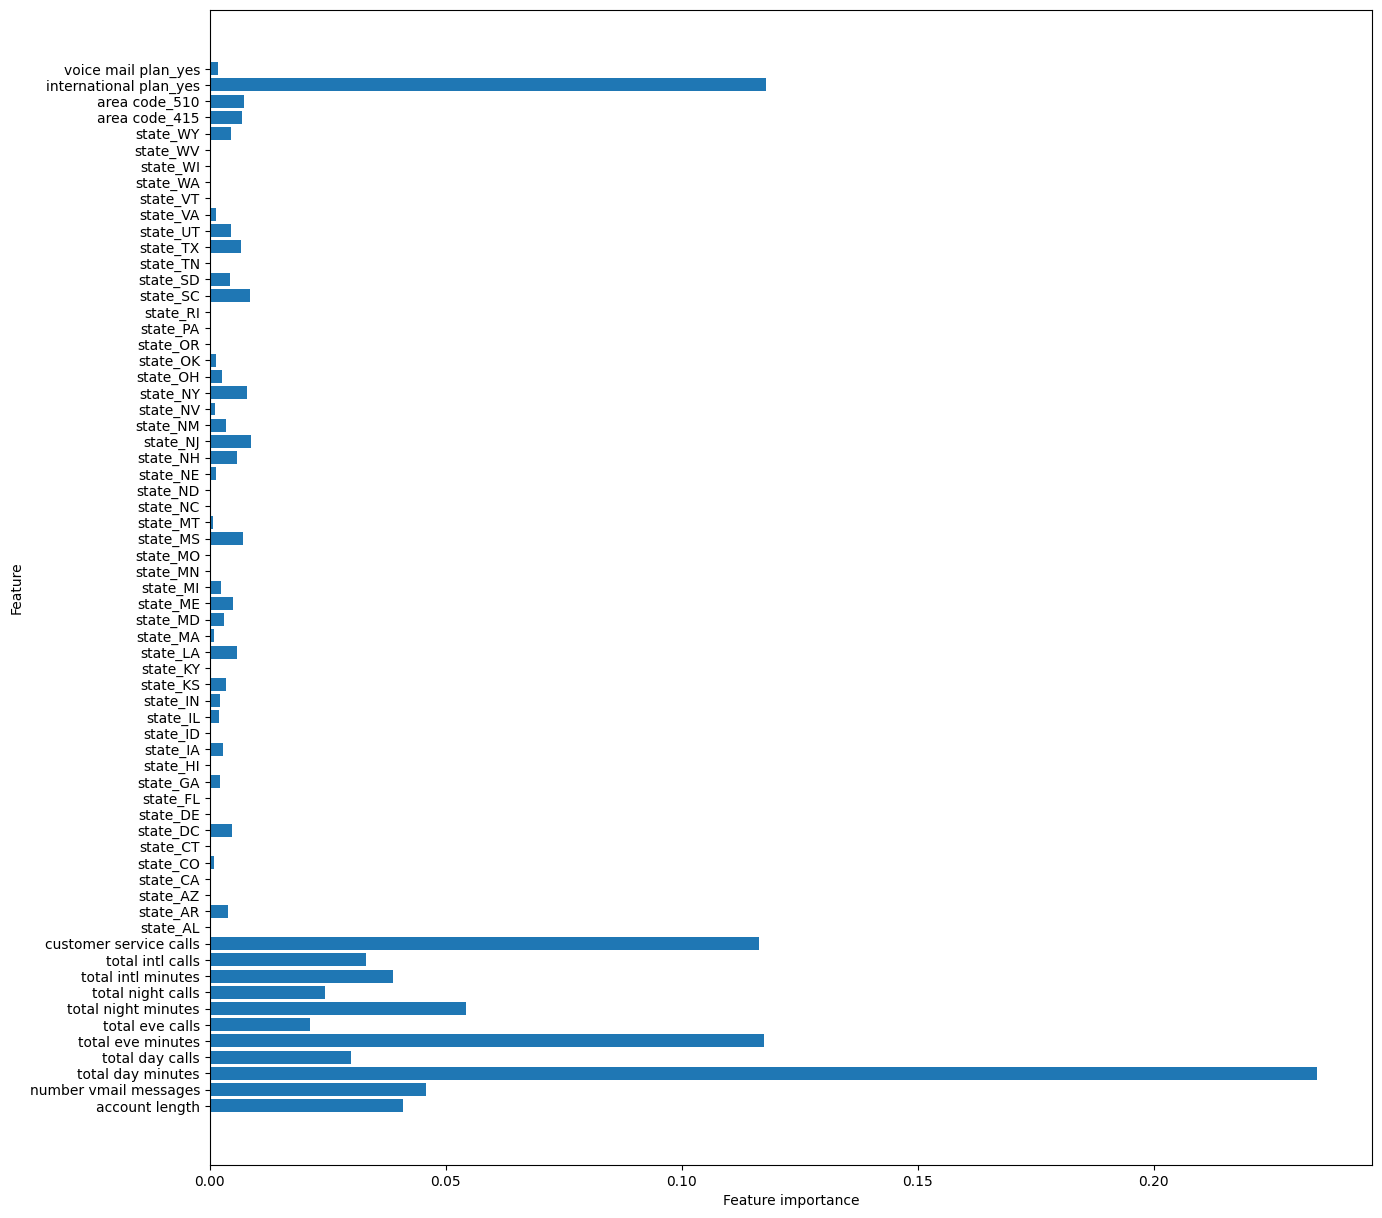

In [37]:
# function to plot feature importances
def plot_feature_importances(pipe, figsize):
    model = pipe.steps[1][1]
    plt.figure(figsize=figsize)
    plt.barh(X_train_resampled.columns, model.feature_importances_, align='center') 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(pipe_dt, (15,15))

total day minutes is an important factor in determining whether a customer would churn or not, followed by total evening minutes and customer service calls. State has the least importance in predicting customer churn.

### Feature selection

Recursive feature elimination with cross-validation is used to select a subset of features relevant for model construction. 

In [38]:
# feature selection using RFECV
rfecv = RFECV(estimator=DecisionTreeClassifier(random_state=42), scoring='recall')
pipe_dt2 = Pipeline(steps=[('scale', StandardScaler()), ('Feature Selection', rfecv), ('clf', DecisionTreeClassifier(random_state=42))])
pipe_dt2.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('Feature Selection',
                 RFECV(estimator=DecisionTreeClassifier(random_state=42),
                       scoring='recall')),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [39]:
# optimal number of features selected via cross-validation
print(f'Optimal number of features: {rfecv.n_features_}' )

Optimal number of features: 51


Out of the 65 features, there are 15 optimal features <br>
The selected features are shown below:

In [40]:
# selected features (assigned a rank of 1)
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X_train_resampled.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_df[rfecv_df['Rank'] == 1]

,Rank
account length,1
international plan_yes,1
state_MN,1
state_MO,1
state_MS,1
state_MT,1
state_NC,1
state_ND,1
state_NE,1
state_NH,1


In [41]:
# remove columns that are not part of the optimal features
cols = rfecv_df[rfecv_df['Rank'] == 1].index
X_train_resampled = X_train_resampled[cols]
X_test = X_test[cols]
X_train_resampled.head(2)

,account length,international plan_yes,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,...,state_DE,state_FL,state_GA,state_IA,state_ID,state_IL,state_IN,state_KS,number vmail messages,state_DC
0,117,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,25,False
1,86,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,False


### Hyperparameter tuning of the decision tree model

The hyperparameters of the decision tree including max_depth, min_samples_leaf, min_samples_split can be tuned to early stop the growth of the tree and prevent the model from overfitting.

In [42]:
# hyperparameter tuning using GridSearchCV
params_dt = {'clf__criterion': ['gini', 'entropy'],
             'clf__max_depth': range(14, 32, 2),
             'clf__min_samples_split' : range(2, 10, 2),
             'clf__min_samples_leaf': [2, 3, 5, 7, 10],
             'clf__max_features': [11, 13, 15]
}

gridsearch_dt = GridSearchCV(pipe_dt, params_dt, cv=4, scoring='recall')
gridsearch_dt.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               random_state=42))]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': range(14, 32, 2),
                         'clf__max_features': [11, 13, 15],
                         'clf__min_samples_leaf': [2, 3, 5, 7, 10],
                         'clf__min_samples_split': range(2, 10, 2)},
             scoring='recall')

In [44]:
# parameters that gave the best result
print(f'Optimal parameters: {gridsearch_dt.best_params_}')

# Mean cross-validated score of the best_estimator
print(f'Validation recall: {gridsearch_dt.best_score_}')

Optimal parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 26, 'clf__max_features': 15, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 8}
Validation recall: 0.8965660974470073


Recall_score: 
Train:  0.9652092148566056
Test:  0.7747747747747747

Precision_score: 
Train:  0.9766888677450047
Test:  0.5341614906832298

Accuracy_score: 
Train:  0.9710860366713682
Test:  0.8800959232613909


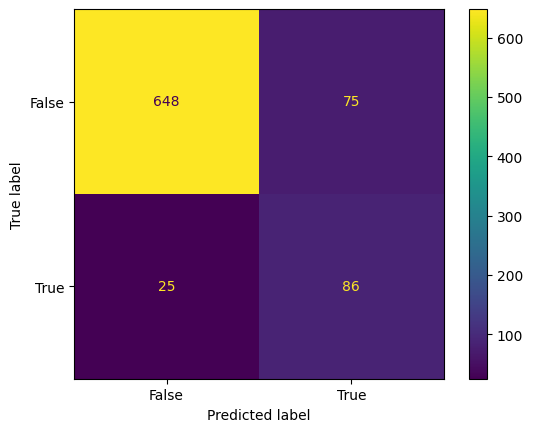

In [45]:
# evaluate the performance of the model
evaluate(gridsearch_dt, X_test, y_test)

On tuning the model, the model is performing better based on the recall score. However, the precision score is slightly low. There is a decrease in the difference between the train scores and the test scores(overfitting reduced).

### Random forest

Random forest is used since it is naturally resistant to noise and variance.

In [46]:
# create a pipeline
pipe_rf = Pipeline(steps=[('scale', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))])
pipe_rf.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scale', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

Recall_score: 
Train:  1.0
Test:  0.8198198198198198

Precision_score: 
Train:  1.0
Test:  0.7711864406779662

Accuracy_score: 
Train:  1.0
Test:  0.9436450839328537


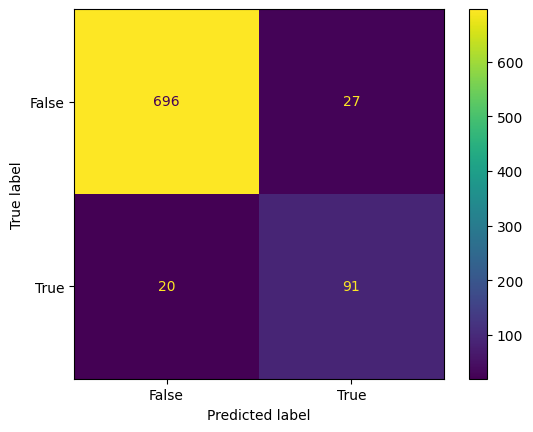

In [47]:
# evaluate model performance
evaluate(pipe_rf, X_test, y_test)

The random forest model has a higher recall compared to the baseline logistic regression model, but a lower recall compared to the decision tree model. <br>
The model is overfitting.

### Hyperparameter tuning of the random forest model

There are some parameters of random forest that can be tuned for the model’s better performance. This includes n_estimators, max_depth, min_samples_split, min_samples_leaf and max_features.

In [52]:
# hyperparameter tuning using GridSearchCV
params_rf = {'rf__n_estimators': range(400, 800, 200),
             'rf__criterion': ['gini', 'entropy'],
             'rf__max_depth': range(14, 20, 2),
             'rf__min_samples_split': range(3, 4, 7),
             'rf__min_samples_leaf': [5, 7, 12]
             
}

gridsearch_rf = GridSearchCV(pipe_rf, params_rf, cv=4, scoring='recall')
gridsearch_rf.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': range(14, 20, 2),
                         'rf__min_samples_leaf': [5, 7, 12],
                         'rf__min_samples_split': range(3, 4, 7),
                         'rf__n_estimators': range(400, 800, 200)},
             scoring='recall')

In [ ]:
# parameters that gave the best result
print(f'Optimal parameters: {gridsearch_rf.best_params_}')

# Mean cross-validated score of the best_estimator
print(f'Validation recall: {gridsearch_rf.best_score_}')

Optimal parameters: {'rf__criterion': 'entropy', 'rf__max_depth': 18, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 3, 'rf__n_estimators': 600}
Validation recall: 0.8702494229925095


Recall_score: 
Train:  0.9619181946403385
Test:  0.6756756756756757

Precision_score: 
Train:  0.9898403483309144
Test:  0.6696428571428571

Accuracy_score: 
Train:  0.9760225669957687
Test:  0.9124700239808153


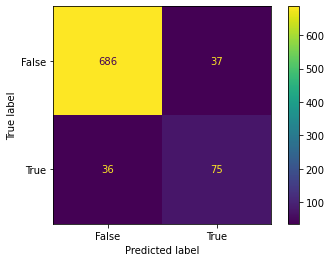

In [ ]:
# evaluate the performance of the model
evaluate(gridsearch_rf, X_test, y_test)

On hyperparameter tuning, the recall increases by 1%. The model utilizes high computational power yet it performs poorly. Its performance is lower than the performance of the decision tree model.

## Model evaluation

Decision tree with tuned hyperparameters is the model with the best performance. The optimal parameters of the tuned model are: {'clf__criterion': 'entropy', 'clf__max_depth': 28, 'clf__max_features': 15, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}<br>
The model has the highest recall score. The accuracy and precision scores are above average. <br>
However, the recall score achieved is below the set score of at least 85%.<br>
The evaluation metric values of the tuned decision tree are shown below:

In [ ]:
# evaluation metrics of the best model based on the test data
print('DECISION TREE(TUNED) SCORES:')
print('Test Recall score: ', recall_score(y_test, gridsearch_dt.predict(X_test)))
print('Test Precision score: ', precision_score(y_test, gridsearch_dt.predict(X_test)))
print('Test Accuracy score: ', accuracy_score(y_test, gridsearch_dt.predict(X_test)))

DECISION TREE(TUNED) SCORES:
Test Recall score:  0.7927927927927928
Test Precision score:  0.5238095238095238
Test Accuracy score:  0.8764988009592326


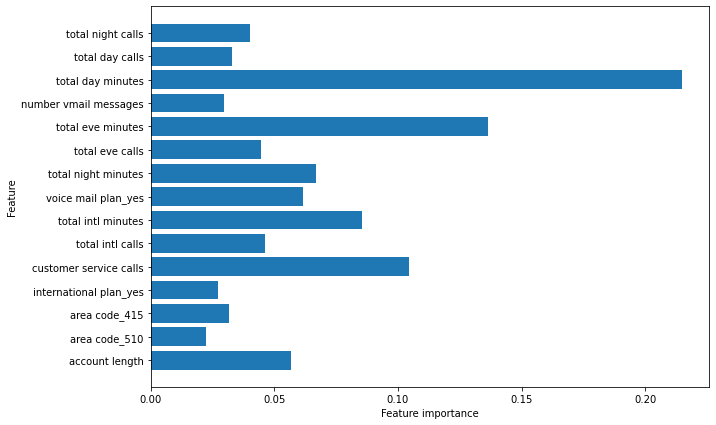

In [ ]:
# plot feature importances of the best model using the defined function
# function takes in the pipeline name and figsize.
plot_feature_importances(gridsearch_dt.best_estimator_, (10,7))

## Conclusions and recommendations

The final model for predicting customer turnover is a decision tree with modified hyperparameters.This model produces the fewest number of false negatives.<br>
The most essential features for predicting client attrition include:
- Total day minutes: the total amount of minutes the consumer has spent on calls during the day.

- Total evening minutes: the amount of minutes spent on calls during the evening. - Customer service calls: the number of calls made to customer service.
- total international minutes: the number of minutes the user has spent on overseas calls.
 
Syriatel should provide good customer service in order to meet customers' expectations and analyse their interactions. They can then follow up on any positive or negative feedback received.<br>
The more minutes a consumer spends on the phone, the less likely he or she is to churn.  The corporation should compare call fee prices to competitors and propose lowering call charges per minute. This can reduce churn among other consumers.



## Next steps

The best-performing model does not attain the goal recall score of 85%. There is still some overfitting in the model, regardless of hyperparameter adjustments.<br>
To avoid overfitting and hence improve model performance, increase the size of the training data sets.

